### Importing Needed Data and Libraries

In [1]:
import pandas as pd
import numpy as np

menu = pd.read_csv(r"D:\Documents\Thesis\data\menu_data.csv")

order = pd.read_csv(r"D:\Documents\Thesis\data\Made_to_Order_Menu_Form2025-05-09_22_30_28.csv")

order_holiday = pd.read_csv(r"D:\Documents\Thesis\data\Christmas_Eve_Menu_Order_Form2025-05-09_22_27_41.csv")

## Cleaning the Order history data

note: we need the orders and the date of the order to create a recommendation system

In [2]:
menu

,Category,Product ID,Menu Name,Price
0,Pork Menu,1000,Baby Back Ribs (Best Seller),"1,100.00PHP"
1,Pork Menu,1001,Pork Caldereta,"1,100.00PHP"
2,Pork Menu,1002,Pork Hamonado,"1,100.00PHP"
3,Pork Menu,1003,Baked Pork Pastel,"1,100.00PHP"
4,Pork Menu,1004,Pork Menudo,"1,100.00PHP"
5,Pork Menu,1005,Pork Binagoongan,950.00PHP
6,Pork Menu,1006,Pork Liempo BBQ,"1,000.00PHP"
7,Beef Menu,1007,Beef Caldereta (Best Seller),"1,100.00PHP"
8,Beef Menu,1008,Beef with Broccoli,"1,100.00PHP"
9,Beef Menu,1009,Beef with Mushrooms,"1,100.00PHP"


In [3]:
order

,Submission Date,Special Instructions:,Name,Mobile Number,Do you want to pick up your order?,Delivery Address,Ordering for: Date / Time,Note: Please order 1 or 2 days prior to the delivery.,Invoice ID,Payment options available:
0,"Dec 18, 2024",NaN,Zhannel Garcia,(0999) 573-8910,Yes.,NaN,"Dec 25, 2024 09:30 AM","Pork Hamonado (Amount: 1,100.00 PHP, QTY: 1, :...",# INV-LT3MCG,Cash on Delivery
1,"Dec 16, 2024",nasi goreng indonesian cuisine i hope there is...,giordan Marco,(0939) 655-4797,"No, I request for a delivery (additional charg...","Infant jesus montessori center philippines, No...","Dec 18, 2024 09:00 AM",Total: 0.00,# INV-GMSB0S,Cash on Delivery
2,"Dec 16, 2024",NaN,Morris Carandang,(0956) 028-7317,Yes.,NaN,"Dec 24, 2024 07:00 PM","Baked Mac (Best Seller) (Amount: 600.00 PHP, Q...",# INV-IULVPJ,GCash
3,"Dec 15, 2024",NaN,Mico Wayne Paderes,(0977) 821-2722,"No, I request for a delivery (additional charg...","Jose Edward Street, Lovely Village Wakas, Taya...","Dec 24, 2024 03:00 PM","Baby Back Ribs (Best Seller) (Amount: 1,100.00...",# INV-XV9NAK,Bank Transfer
4,"Dec 14, 2024",Paorder po ng bakedmac,Josa Gracia Panganiban,(0929) 596-7262,Yes.,NaN,"Dec 14, 2024 05:30 PM",Total: 0.00,# INV-479LO6,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...
265,"Feb 5, 2022",cordon bleu-no ham\nno content of any pork or ...,Haydee Tutor,(6391) 929-1921,"No, I request for a delivery (additional charg...","14 general luna street Angeles zone 4, Tayabas...","Feb 9, 2022 05:00 PM",Chicken Cordon Bleu (Best Seller) (Amount: 800...,# INV-IRYFTK,Cash on Delivery
266,"Feb 2, 2022","Delivery Date: Feb 05, Saturday\n@ 10:am\nJose...",Maria Susana Paderes,(0917) 136-0496,"No, I request for a delivery (additional charg...","Jose Edward St. Lovely Vill Wakas, Tayabas, RJ...","Feb 5, 2022 10:00 AM","Pork Hamonado (Amount: 1,100.00 PHP, QTY: 1, :...",# INV-UM6EFO,Cash on Delivery
267,"Feb 1, 2022",NaN,Marielle Bebiro,(0999) 900-5092,Yes.,NaN,"Feb 2, 2022 12:30 PM",Chicken Cordon Bleu (Best Seller) (Amount: 450...,# INV-WFGBVK,NaN
268,"Jan 30, 2022",NaN,Ma Theresa Melo,(0998) 980-8097,"No, I request for a delivery (additional charg...","Gomez Ext Brgy 3, Lucena City, Across Bwest Co...","Jan 31, 2022 05:00 PM","Trio Set A (Amount: 1,500.00 PHP, QTY: 1, : La...",# INV-U3R4D9,Cash on Delivery


In [4]:
order = order.iloc[:,[2,0,7]]
order.columns = ["Name", "Date", "Menu Items"]
order

,Name,Date,Menu Items
0,Zhannel Garcia,"Dec 18, 2024","Pork Hamonado (Amount: 1,100.00 PHP, QTY: 1, :..."
1,giordan Marco,"Dec 16, 2024",Total: 0.00
2,Morris Carandang,"Dec 16, 2024","Baked Mac (Best Seller) (Amount: 600.00 PHP, Q..."
3,Mico Wayne Paderes,"Dec 15, 2024","Baby Back Ribs (Best Seller) (Amount: 1,100.00..."
4,Josa Gracia Panganiban,"Dec 14, 2024",Total: 0.00
...,...,...,...
265,Haydee Tutor,"Feb 5, 2022",Chicken Cordon Bleu (Best Seller) (Amount: 800...
266,Maria Susana Paderes,"Feb 2, 2022","Pork Hamonado (Amount: 1,100.00 PHP, QTY: 1, :..."
267,Marielle Bebiro,"Feb 1, 2022",Chicken Cordon Bleu (Best Seller) (Amount: 450...
268,Ma Theresa Melo,"Jan 30, 2022","Trio Set A (Amount: 1,500.00 PHP, QTY: 1, : La..."


In [5]:
def extract_menu_items(text):
    if not isinstance(text, str) or "Amount:" not in text:
        return []  # Safely return empty list
    items = text.strip().split('\n')
    return [item.split("(Amount:")[0].strip() for item in items if "(Amount:" in item]

# Use .loc to avoid the warning
order.loc[:, 'Menu Items'] = order['Menu Items'].apply(extract_menu_items)

# Filter only rows that actually contain menu items
order = order[order['Menu Items'].map(len) > 0].reset_index(drop=True)

order   

,Name,Date,Menu Items
0,Zhannel Garcia,"Dec 18, 2024","[Pork Hamonado, Leche Cassava Cake, Mango Jell..."
1,Morris Carandang,"Dec 16, 2024","[Baked Mac (Best Seller), Lasagna]"
2,Mico Wayne Paderes,"Dec 15, 2024","[Baby Back Ribs (Best Seller), Chicken Fingers]"
3,Abby Flavier,"Dec 12, 2024",[Chicken Cordon Bleu (Best Seller)]
4,Kaye Mia,"Dec 11, 2024",[Baked Mac (Best Seller)]
...,...,...,...
258,Haydee Tutor,"Feb 5, 2022","[Chicken Cordon Bleu (Best Seller), Flavored F..."
259,Maria Susana Paderes,"Feb 2, 2022","[Pork Hamonado, Pork Liempo BBQ, Beef Calderet..."
260,Marielle Bebiro,"Feb 1, 2022",[Chicken Cordon Bleu (Best Seller)]
261,Ma Theresa Melo,"Jan 30, 2022","[Trio Set A, Trio Set C]"


In [6]:
order_holiday = order_holiday.iloc[:,[4,0,1]]
order_holiday.columns = ["Name", "Date", "Menu Items"]
order_holiday

,Name,Date,Menu Items
0,Ching Decena,"Dec 19, 2022","Lasagna (Amount: 900.00 PHP, QTY: 1, : Full Tr..."
1,Myla Martinez,"Dec 18, 2022",Chicken Cordon Bleu (Best Seller) (Amount: 850...
2,Iana Puache,"Dec 18, 2022","Baby Back Ribs (Best Seller) (Amount: 1,100.00..."
3,Alanisse Marquez,"Dec 18, 2022","Beef Caldereta (Best Seller) (Amount: 1,150.00..."
4,Glacy Mae Chua,"Dec 17, 2022","Maja Blanca (Best Seller) (Amount: 600.00 PHP,..."
5,Marites Abuyan,"Dec 16, 2022","Beef Caldereta (Best Seller) (Amount: 1,150.00..."
6,Risa Valdez,"Dec 15, 2022","Beef Caldereta (Best Seller) (Amount: 1,150.00..."
7,Airon Dave Sia,"Dec 15, 2022","Pork Hamonado (Amount: 1,000.00 PHP, QTY: 1, :..."
8,Zhannel Garcia,"Dec 12, 2022",Chicken Cordon Bleu (Best Seller) (Amount: 850...
9,Zhannel Garcia,"Dec 12, 2022","Lasagna (Amount: 900.00 PHP, QTY: 1, : Full Tr..."


In [7]:
def extract_menu_items(text):
    if not isinstance(text, str) or "Amount:" not in text:
        return []
    items = text.strip().split('\n')
    return [item.split("(Amount:")[0].strip() for item in items if "(Amount:" in item]

order_holiday.loc[:, 'Menu Items'] = order_holiday['Menu Items'].apply(extract_menu_items)

order_holiday = order_holiday[order_holiday['Menu Items'].map(len) > 0].reset_index(drop=True)

order_holiday   

,Name,Date,Menu Items
0,Ching Decena,"Dec 19, 2022","[Lasagna, Potato Salad]"
1,Myla Martinez,"Dec 18, 2022","[Chicken Cordon Bleu (Best Seller), Flavored F..."
2,Iana Puache,"Dec 18, 2022","[Baby Back Ribs (Best Seller), Chicken Cordon ..."
3,Alanisse Marquez,"Dec 18, 2022","[Beef Caldereta (Best Seller), Chicken Cordon ..."
4,Glacy Mae Chua,"Dec 17, 2022",[Maja Blanca (Best Seller)]
5,Marites Abuyan,"Dec 16, 2022","[Beef Caldereta (Best Seller), Baby Back Ribs ..."
6,Risa Valdez,"Dec 15, 2022","[Beef Caldereta (Best Seller), Chicken Cordon ..."
7,Airon Dave Sia,"Dec 15, 2022","[Pork Hamonado, Chicken Cordon Bleu (Best Sell..."
8,Zhannel Garcia,"Dec 12, 2022","[Chicken Cordon Bleu (Best Seller), Lasagna]"
9,Zhannel Garcia,"Dec 12, 2022",[Lasagna]


In [8]:
df = pd.concat([order, order_holiday])
df

,Name,Date,Menu Items
0,Zhannel Garcia,"Dec 18, 2024","[Pork Hamonado, Leche Cassava Cake, Mango Jell..."
1,Morris Carandang,"Dec 16, 2024","[Baked Mac (Best Seller), Lasagna]"
2,Mico Wayne Paderes,"Dec 15, 2024","[Baby Back Ribs (Best Seller), Chicken Fingers]"
3,Abby Flavier,"Dec 12, 2024",[Chicken Cordon Bleu (Best Seller)]
4,Kaye Mia,"Dec 11, 2024",[Baked Mac (Best Seller)]
...,...,...,...
12,joy Lingapin,"Dec 10, 2022","[Baby Back Ribs (Best Seller), Flavored Fried ..."
13,Jinky Amo,"Dec 9, 2022","[Baby Back Ribs (Best Seller), Chicken Cordon ..."
14,Jinky Amo,"Dec 9, 2022","[Baby Back Ribs (Best Seller), Chicken Cordon ..."
15,Deity Evero,"Dec 9, 2022",[Baby Back Ribs (Best Seller)]


In [9]:
def clean_item(name):
    return name.split(' (')[0].strip()

df['Menu Items'] = df['Menu Items'].apply(lambda items: [clean_item(i) for i in items])
df

,Name,Date,Menu Items
0,Zhannel Garcia,"Dec 18, 2024","[Pork Hamonado, Leche Cassava Cake, Mango Jelly]"
1,Morris Carandang,"Dec 16, 2024","[Baked Mac, Lasagna]"
2,Mico Wayne Paderes,"Dec 15, 2024","[Baby Back Ribs, Chicken Fingers]"
3,Abby Flavier,"Dec 12, 2024",[Chicken Cordon Bleu]
4,Kaye Mia,"Dec 11, 2024",[Baked Mac]
...,...,...,...
12,joy Lingapin,"Dec 10, 2022","[Baby Back Ribs, Flavored Fried Chicken, Panci..."
13,Jinky Amo,"Dec 9, 2022","[Baby Back Ribs, Chicken Cordon Bleu, Lasagna,..."
14,Jinky Amo,"Dec 9, 2022","[Baby Back Ribs, Chicken Cordon Bleu, Lasagna,..."
15,Deity Evero,"Dec 9, 2022",[Baby Back Ribs]


In [10]:
import re

def clean_item(name):
    # Remove anything in parentheses and lowercase the name
    return re.sub(r"\s*\(.*?\)", "", name).strip().lower()

df['Menu Items'] = df['Menu Items'].apply(
    lambda items: [clean_item(item) for item in items]
)

### Algorithms

checking which algorithms performs the best

In [11]:
from collections import defaultdict
import itertools

co_occurrence = defaultdict(lambda: defaultdict(int))
item_counts = defaultdict(int)

# Assuming you have a DataFrame `all_orders` with a column "Menu Items" (lists)
for items in df['Menu Items']:
    items = list(set(items))  # remove duplicates
    for item in items:
        item_counts[item] += 1
    for item1, item2 in itertools.combinations(items, 2):
        co_occurrence[item1][item2] += 1
        co_occurrence[item2][item1] += 1


In [12]:

#Building Recommendation Function
def recommend(item, top_n=3):
    if item not in co_occurrence:
        return []

    # Sort related items by co-occurrence frequency
    related_items = co_occurrence[item]
    sorted_items = sorted(related_items.items(), key=lambda x: x[1], reverse=True)
    return [i[0] for i in sorted_items[:top_n]]

In [13]:
def recommend_with_match_rate(item, top_n=3, min_support=2):
    item = clean_item(item)
    if item not in co_occurrence:
        return []

    total = item_counts[item]
    matches = [
        (other, count / total)
        for other, count in co_occurrence[item].items()
        if count >= min_support
    ]
    matches.sort(key=lambda x: x[1], reverse=True)
    return matches[:top_n]

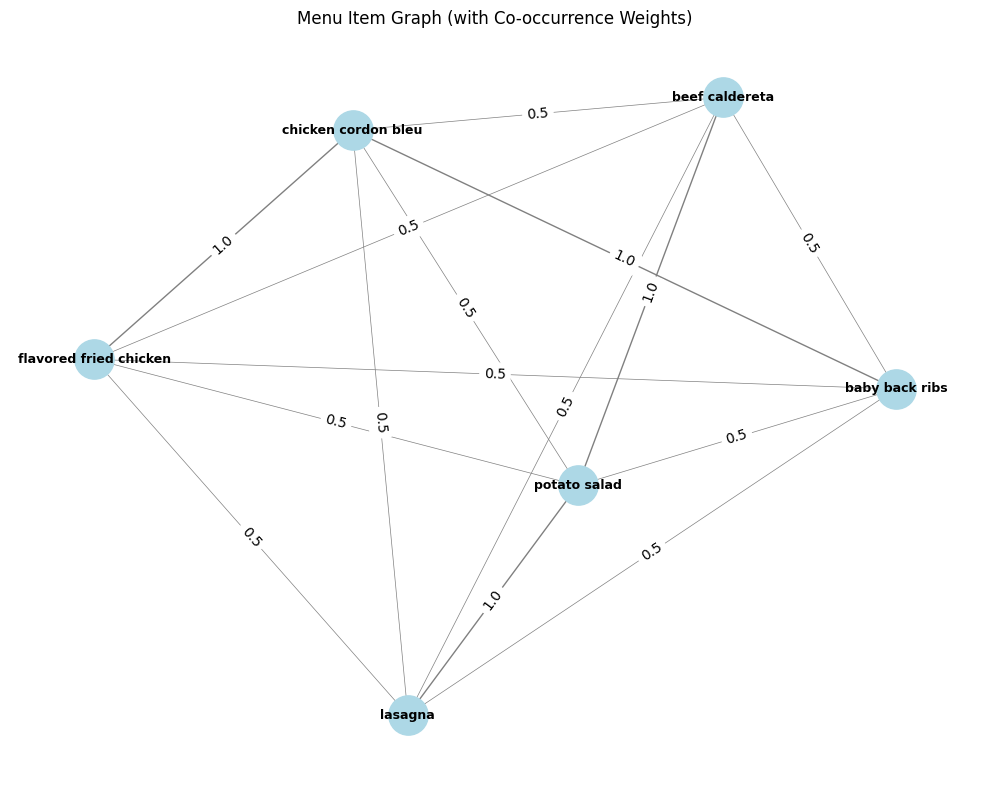

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import re
from collections import defaultdict

# Sample data
sample_data = {
    "Name": ["User1", "User2", "User3", "User4"],
    "Menu Items": [
        ["lasagna", "potato salad"],
        ["chicken cordon bleu", "flavored fried chicken"],
        ["baby back ribs", "chicken cordon bleu"],
        ["beef caldereta", "potato salad"]
    ]
}
df_sample = pd.DataFrame(sample_data)

# Clean item names
def clean_item(name):
    return re.sub(r"\s*\(.*?\)", "", name).strip().lower()

# Get co-occurrence and all unique items
co_occurrence = defaultdict(lambda: defaultdict(int))
item_set = set()

for items in df_sample["Menu Items"]:
    cleaned = [clean_item(item) for item in items]
    item_set.update(cleaned)
    for item1, item2 in itertools.combinations(set(cleaned), 2):
        co_occurrence[item1][item2] += 1
        co_occurrence[item2][item1] += 1

# Create fully connected graph
G = nx.Graph()
all_items = list(item_set)

for item1, item2 in itertools.combinations(all_items, 2):
    weight = co_occurrence[item1][item2] if item2 in co_occurrence[item1] else 0.5  # Default small weight
    G.add_edge(item1, item2, weight=weight)

# Draw graph
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Add edge labels
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Menu Item Graph (with Co-occurrence Weights)")
plt.axis('off')
plt.tight_layout()
plt.show()


In [15]:
print("Order of the customer: 'sinukmani / biko'")
print("Suggestion with Match Rate:", recommend('sinukmani / biko'))

Order of the customer: 'sinukmani / biko'
Suggestion with Match Rate: []


In [16]:
print("Order of the customer: 'lasagna'")
print("Suggestion with Match Rate:", recommend('lasagna'))

Order of the customer: 'lasagna'
Suggestion with Match Rate: ['potato salad']


In [17]:
print("Order of the customer: 'baby back ribs'")
print("Suggestion with Match Rate:", recommend('baby back ribs'))

Order of the customer: 'baby back ribs'
Suggestion with Match Rate: ['chicken cordon bleu']
